In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import json

### Load the Training, Testing and Evaluation Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from google.colab import files
uploaded = files.upload()

Saving updated_X_recommend.pkl to updated_X_recommend.pkl
Saving updated_X_test.pkl to updated_X_test.pkl
Saving updated_X_train.pkl to updated_X_train.pkl
Saving updated_y_test.pkl to updated_y_test.pkl
Saving updated_y_train.pkl to updated_y_train.pkl


In [5]:
# Load the data
X_train = pd.read_pickle('updated_X_train.pkl')
y_train = pd.read_pickle('updated_y_train.pkl')
X_test = pd.read_pickle('updated_X_test.pkl')
y_test = pd.read_pickle('updated_y_test.pkl')
X_recommend = pd.read_pickle('updated_X_recommend.pkl')

In [6]:
X_train.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,genre_modern indie pop,genre_modern rock,genre_nashville indie,genre_new romantic,genre_nz folk,genre_permanent wave,genre_pop,genre_pop punk,genre_pop rock,genre_shimmer pop
5430,175093.0,0.143,0.2690,10.0,-17.614,1.0,0.0351,0.290,0.859000,0.152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1349,141062.0,0.106,0.0202,8.0,-32.719,1.0,0.0430,0.799,0.769000,0.109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1754,210253.0,0.417,0.6890,2.0,-8.302,0.0,0.1780,0.575,0.000000,0.496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7103,333329.0,0.499,0.5830,9.0,-6.628,0.0,0.2100,0.227,0.000000,0.103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4726,168854.0,0.828,0.3330,4.0,-10.351,0.0,0.0332,0.732,0.000526,0.117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Normalize the Data with Min-Max Normalization

Since Logistic Regression is based on Gradient Descent which is sensitive to range of features.  
Features that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus all input features are normalized to the range [0,1]

In [7]:
# Normalize features to [0,1]
minmax_scaler = MinMaxScaler()
X_train = pd.DataFrame(minmax_scaler.fit_transform(X_train), columns=X_train.columns)

In [8]:
X_train.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,genre_modern indie pop,genre_modern rock,genre_nashville indie,genre_new romantic,genre_nz folk,genre_permanent wave,genre_pop,genre_pop punk,genre_pop rock,genre_shimmer pop
0,0.044912,0.148187,0.268478,0.909091,0.608825,1.0,0.036449,0.291164,0.862450,0.137400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.035560,0.109845,0.019160,0.727273,0.258783,1.0,0.044652,0.802209,0.772088,0.093243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.054573,0.432124,0.689354,0.181818,0.824620,0.0,0.184839,0.577309,0.000000,0.490655,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.088393,0.517098,0.583133,0.818182,0.863413,0.0,0.218069,0.227911,0.000000,0.087082,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.043197,0.858031,0.332612,0.363636,0.777137,0.0,0.034476,0.734939,0.000528,0.101458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# model
logistic_regression = LogisticRegression()

# fit the model
logistic_regression.fit(X_train, y_train)

# prediction
predictions = logistic_regression.predict(X_test)

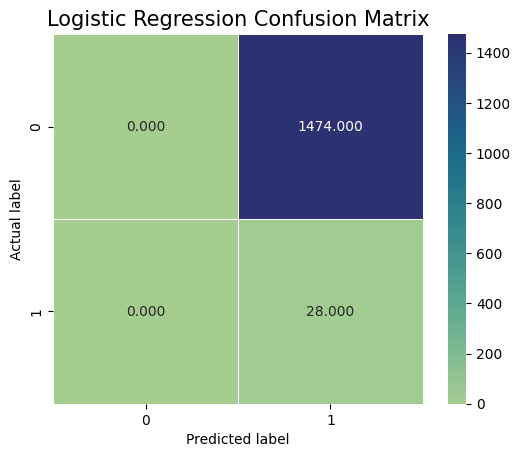

In [10]:
cm = confusion_matrix(y_test, predictions)
plt.figure()
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'crest');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Logistic Regression Confusion Matrix', size = 15);
plt.show()

What??? 0 TPs?

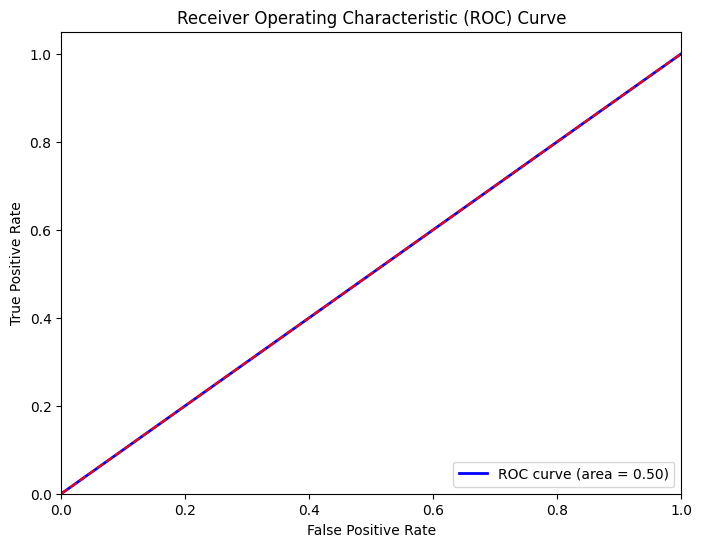

In [11]:
from sklearn.metrics import roc_curve, auc

# Calculate predicted probabilities for positive class
probabilities = logistic_regression.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [12]:
precision_macro_average = precision_score(y_test, predictions, average='macro')
precision_weighted_average = precision_score(y_test, predictions, average='weighted')

recall_macro_average = recall_score(y_test, predictions, average='macro')
recall_weighted_average = recall_score(y_test, predictions, average='weighted')

f1_macro_average = f1_score(y_test, predictions, average='macro')
f1_weighted_average = f1_score(y_test, predictions, average='weighted')


print(f'Precision (macro average)--> {round(precision_macro_average*100, 2)}%')
print(f'Precision (weighted average)--> {round(precision_weighted_average*100, 2)}%')

print(f'Recall (macro average)--> {round(recall_macro_average*100, 2)}%')
print(f'Recall (weighted average)--> {round(recall_weighted_average*100, 2)}%')

print(f'F1 score (macro average)--> {round(f1_macro_average*100, 2)}%')
print(f'F1 score (weighted average)--> {round(f1_weighted_average*100, 2)}%')

Precision (macro average)--> 0.93%
Precision (weighted average)--> 0.03%
Recall (macro average)--> 50.0%
Recall (weighted average)--> 1.86%
F1 score (macro average)--> 1.83%
F1 score (weighted average)--> 0.07%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1474
           1       0.02      1.00      0.04        28

    accuracy                           0.02      1502
   macro avg       0.01      0.50      0.02      1502
weighted avg       0.00      0.02      0.00      1502



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# File path on Google Drive
file_path = "/content/drive/MyDrive/year 29/Data Science /notebooks/spotify/model/f1_scores.json"

# Serialize f1 scores into a json file for later comparison between all models
model_name = "updated_logistic_regression"
entry = {"f1_macro_average":f1_macro_average, "f1_weighted_average":f1_weighted_average}


with open(file_path, "r") as file:
    data = json.load(file)
data[model_name] = entry
with open(file_path, "w") as file:
    json.dump(data, file, indent=4)